# Regression and Time Series Models Template
Template for regression and time series based predictive modelling including the model development steps.

Based on the code from *Machine Learning and Data Science Blueprints for Finance: From Building Trading Strategies to Robo-Advisors Using Python* 
by Hariom Tatsat, Sahil Puri , Brad Lookabaugh

See also https://github.com/tatsath/fin-ml


## Content

* [1. Problem Statement](#1)
* [2. Getting Started - Load Libraries and Dataset](#2)
    * [2.1. Load Libraries](#2.1)    
    * [2.2. Load Dataset](#2.2)
* [3. Exploratory Data Analysis](#3)
    * [3.1 Descriptive Statistics](#3.1)    
    * [3.2. Data Visualisation](#3.2)
* [4. Data Preparation](#4)
    * [4.1 Data Cleaning](#4.1)
    * [4.3.Feature Selection](#4.2)
    * [4.3.Data Transformation](#4.3) 
        * [4.3.1 Rescaling ](#4.3.1)
        * [4.3.2 Standardization](#4.3.2)
        * [4.3.3 Normalization](#4.3.3)    
* [5.Evaluate Algorithms and Models](#5)        
    * [5.1. Train/Test Split](#5.1)
    * [5.2. Test Options and Evaluation Metrics](#5.2)
    * [5.3. Compare Models and Algorithms](#5.3)
        * [5.3.1 Common Regression Models](#5.3.1)
        * [5.3.2 Ensemble Models](#5.3.2)
        * [5.3.3 Deep Learning Models](#5.3.3) 
        * [5.3.4 K-folds cross validation](#5.3.4)
        * [5.3.5 lgorithm Comparison](#5.3.5)
    * [5.4. Time Series based Models-ARIMA and LSTM](#5.4)
        * [5.4.1 ARIMA Model](#5.4.1)
        * [5.4.2 LSTM Model](#5.4.2) 
        * [5.4.3Overall Comparison of all the algorithms ( including Time Series Algorithms)](#5.4.3)         
* [6. Model Tuning and Grid Search](#6)
    * [6.1 Common Regression, Ensemble and DeepNNRegressor Grid Search](#6.1)
    * [6.2 ARIMA and LSTM Grid Search](#6.2) 
* [7. Finalize the Model](#7)  
    * [7.1. Results on test dataset](#7.1)
    * [7.1. Variable Intuition/Feature Selection](#7.2) 
    * [7.3. Save model for later use](#7.3)


<a id='1'></a>
# 1. Problem Statement

Goal in this jupyter notebook:
- How to work through a predictive modeling problem end-to-end. This notebook is applicable both for regression and classification problems.
- How to use data transforms to improve model performance.
- How to use algorithm tuning to improve model performance.
- How to use ensemble methods and tuning of ensemble methods to improve model performance.
- How to use deep Learning methods.
- Following models are implemented

    * Linear Regression
    * Lasso
    * Elastic Net 
    * KNN
    * Decision Tree (CART)
    * Support Vector Machine 
    * Ada Boost
    * Gradient Boosting Method
    * Random Forest
    * Extra Trees
    * Neural Network - Shallow - Using sklearn
    * Deep Neural Network - Using Keras
- Time Series Models
    * ARIMA Model
    * LSTM - Using Keras
    

<a id='2'></a>
# 2. Getting Started- Loading the data and python packages

<a id='2.1'></a>
## 2.1. Loading the python packages

In [4]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import SGD   
##from tensorflow.keras.optimizers import SGD
#from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

#Libraries for Saving the Model
from pickle import dump
from pickle import load

<a id='2.2'></a>
## 2.2. Loading the Data

In [43]:
# Get the data by webscapping using pandas datareader
return_period = 21

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance

import yfinance as yf

stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers)
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+'_pred'

X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [21, 63, 126,252]], axis=1).dropna()
X4.columns = ['1M', '3M', '6M', '1Y']

X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna()
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

module 'yfinance' is installed
[*********************100%***********************]  3 of 3 completed


In [6]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
dataset

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,1M,3M,6M,1Y
2017-07-18,0.010077,0.029125,-0.008922,0.004928,0.021965,0.002910,0.002122,-0.047393,0.046066,0.119907,0.170674,0.331024
2017-07-19,-0.014651,0.017836,-0.048361,0.002777,0.031798,0.014987,0.008055,-0.103725,0.041324,0.132885,0.178765,0.354889
2017-07-20,-0.018271,0.023660,-0.048190,0.000896,0.024101,0.015417,0.009379,-0.115228,0.059825,0.130699,0.186832,0.307996
2017-07-21,-0.017162,0.015463,-0.044611,-0.001618,0.024116,0.015505,0.008506,-0.113023,0.048878,0.111242,0.173984,0.304155
2017-07-24,-0.000682,0.021966,-0.056009,-0.001439,0.023375,0.012881,0.005519,-0.060687,0.046442,0.091788,0.167905,0.287872
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-11,-0.027118,-0.125738,0.046131,0.038760,-0.056351,-0.111068,-0.072282,0.294256,-0.090606,-0.175608,-0.250274,0.094444
2022-05-12,-0.050297,-0.123791,0.065531,0.020426,-0.069201,-0.123478,-0.085558,0.375695,-0.099485,-0.166984,-0.254985,0.057563
2022-05-13,-0.063479,-0.112693,0.069515,0.025947,-0.064069,-0.087670,-0.067682,0.240438,-0.096660,-0.120065,-0.237556,0.059059
2022-05-17,-0.083112,-0.091840,0.104359,0.019838,-0.043244,-0.071450,-0.052411,0.163195,-0.050071,-0.116708,-0.226852,0.101296


The data in dataset are constructued in the folloiwng form:
consider the time series 
$$S_1, S_2, S_3, \cdots , S_T$$
and $k$ is the return period considered, then the for any date $t$, the lagged returns for GOOGL, IBM, ..., defined as
$$ r_t = \log S_t - \log S_{t-k}$$
The lagged returns for MSFT with lag of 1M, 3M, 6M, 1Y are defined similarly, e.g.,
$$r_{1M,t}=\log S_t - \log S_{t-21}$$
While the MSFT_pred return is defined 
$$r_t=\log S_{t+k}- \log S_t$$

In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:
dataset.shape

(1143, 12)

#### Converting the data to supervised regression format
All the predictor variables are changed to lagged variable, as the t-1 value of the lagged variable will be used for prediction. 

This step might not be necessary. Essentially, we are using the information on past lagged returns observed after the market close yesterday, to forecast the future returns assuming we buy the stock at today's closing price. If we want to make it more realistic, we should assume the buying price is today's open price.


In [10]:
def series_to_supervised(data, lag=1):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)    
    cols, names = list(), list()
    for i in range(lag, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg = pd.DataFrame(data.iloc[:,0]).join(agg)
    agg.dropna(inplace=True)
    return agg

In [54]:
dataset= series_to_supervised(dataset,1)
dataset.tail(5)

,MSFT_pred,MSFT_pred(t-1),GOOGL(t-1),IBM(t-1),DEXJPUS(t-1),DEXUSUK(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
2022-05-12,-0.050,-0.027,-0.126,0.046,0.039,-0.056,-0.111,-0.072,0.294,-0.091,-0.176,-0.250,0.094
2022-05-13,-0.063,-0.050,-0.124,0.066,0.020,-0.069,-0.123,-0.086,0.376,-0.099,-0.167,-0.255,0.058
2022-05-17,-0.083,-0.063,-0.113,0.070,0.026,-0.064,-0.088,-0.068,0.240,-0.097,-0.120,-0.238,0.059
2022-05-18,-0.026,-0.083,-0.092,0.104,0.020,-0.043,-0.071,-0.052,0.163,-0.050,-0.117,-0.227,0.101
2022-05-19,0.001,-0.026,-0.150,0.041,-0.003,-0.048,-0.129,-0.103,0.371,-0.114,-0.162,-0.284,0.052


<a id='3'></a>
# 3. Exploratory Data Analysis

<a id='3.1'></a>
## 3.1. Descriptive Statistics

In [12]:
# shape
dataset.shape

(1142, 13)

In [13]:
# peek at data
pd.set_option('display.width', 100)
dataset.head(4)

,MSFT_pred,MSFT_pred(t-1),GOOGL(t-1),IBM(t-1),DEXJPUS(t-1),DEXUSUK(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
2017-07-19,-0.014651,0.010077,0.029125,-0.008922,0.004928,0.021965,0.002910,0.002122,-0.047393,0.046066,0.119907,0.170674,0.331024
2017-07-20,-0.018271,-0.014651,0.017836,-0.048361,0.002777,0.031798,0.014987,0.008055,-0.103725,0.041324,0.132885,0.178765,0.354889
2017-07-21,-0.017162,-0.018271,0.023660,-0.048190,0.000896,0.024101,0.015417,0.009379,-0.115228,0.059825,0.130699,0.186832,0.307996
2017-07-24,-0.000682,-0.017162,0.015463,-0.044611,-0.001618,0.024116,0.015505,0.008506,-0.113023,0.048878,0.111242,0.173984,0.304155


In [14]:
# types
pd.set_option('display.max_rows', 500)
dataset.dtypes

MSFT_pred         float64
MSFT_pred(t-1)    float64
GOOGL(t-1)        float64
IBM(t-1)          float64
DEXJPUS(t-1)      float64
DEXUSUK(t-1)      float64
SP500(t-1)        float64
DJIA(t-1)         float64
VIXCLS(t-1)       float64
1M(t-1)           float64
3M(t-1)           float64
6M(t-1)           float64
1Y(t-1)           float64
dtype: object

In [15]:
# describe data
pd.set_option('display.precision', 3)
dataset.describe()

,MSFT_pred,MSFT_pred(t-1),GOOGL(t-1),IBM(t-1),DEXJPUS(t-1),DEXUSUK(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
count,1142.000,1142.000,1142.000,1142.000,1142.000,1.142e+03,1142.000,1142.000,1142.000,1142.000,1142.000,1142.000,1142.000
mean,0.023,0.023,0.015,0.002,0.002,-7.305e-04,0.009,0.007,0.018,0.025,0.078,0.165,0.336
std,0.061,0.061,0.072,0.075,0.018,2.328e-02,0.052,0.053,0.302,0.061,0.085,0.093,0.089
min,-0.302,-0.302,-0.351,-0.461,-0.069,-1.207e-01,-0.400,-0.444,-0.827,-0.302,-0.212,-0.255,0.039
25%,-0.010,-0.010,-0.023,-0.035,-0.007,-1.575e-02,-0.008,-0.012,-0.156,-0.008,0.032,0.129,0.279
50%,0.029,0.029,0.025,0.009,0.001,-7.565e-04,0.018,0.015,-0.021,0.031,0.085,0.173,0.342
75%,0.061,0.061,0.059,0.042,0.011,1.478e-02,0.034,0.033,0.160,0.061,0.135,0.224,0.397
max,0.244,0.244,0.211,0.230,0.076,6.963e-02,0.203,0.214,1.799,0.244,0.391,0.422,0.595


We should drop MSFT(t-1)

In [16]:
dataset.drop(columns=['MSFT_pred(t-1)'], inplace=True)

In [17]:
dataset.head(4)

,MSFT_pred,GOOGL(t-1),IBM(t-1),DEXJPUS(t-1),DEXUSUK(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
2017-07-19,-1.465e-02,0.029,-0.009,4.928e-03,0.022,0.003,0.002,-0.047,0.046,0.120,0.171,0.331
2017-07-20,-1.827e-02,0.018,-0.048,2.777e-03,0.032,0.015,0.008,-0.104,0.041,0.133,0.179,0.355
2017-07-21,-1.716e-02,0.024,-0.048,8.958e-04,0.024,0.015,0.009,-0.115,0.060,0.131,0.187,0.308
2017-07-24,-6.824e-04,0.015,-0.045,-1.618e-03,0.024,0.016,0.009,-0.113,0.049,0.111,0.174,0.304


<a id='3.2'></a>
## 3.2. Data Visualization

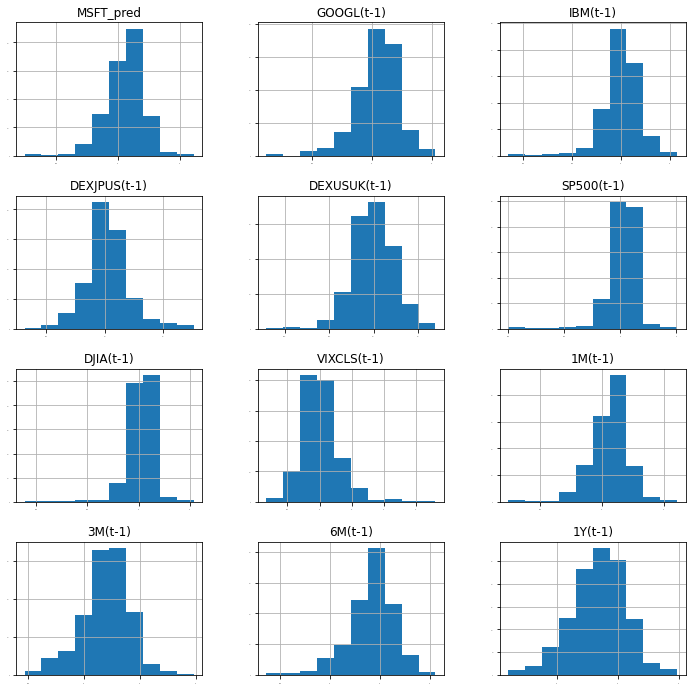

In [18]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

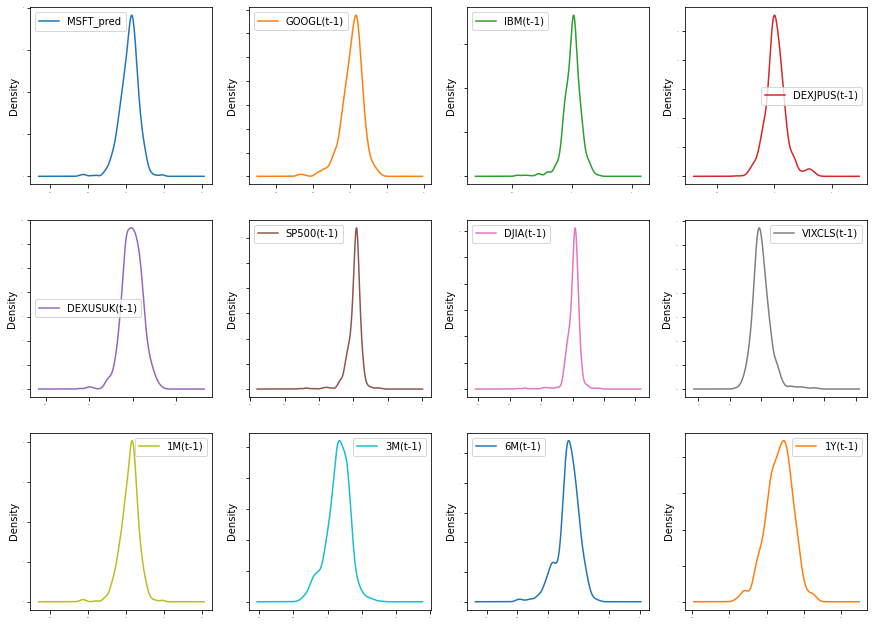

In [19]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,15))
plt.show()

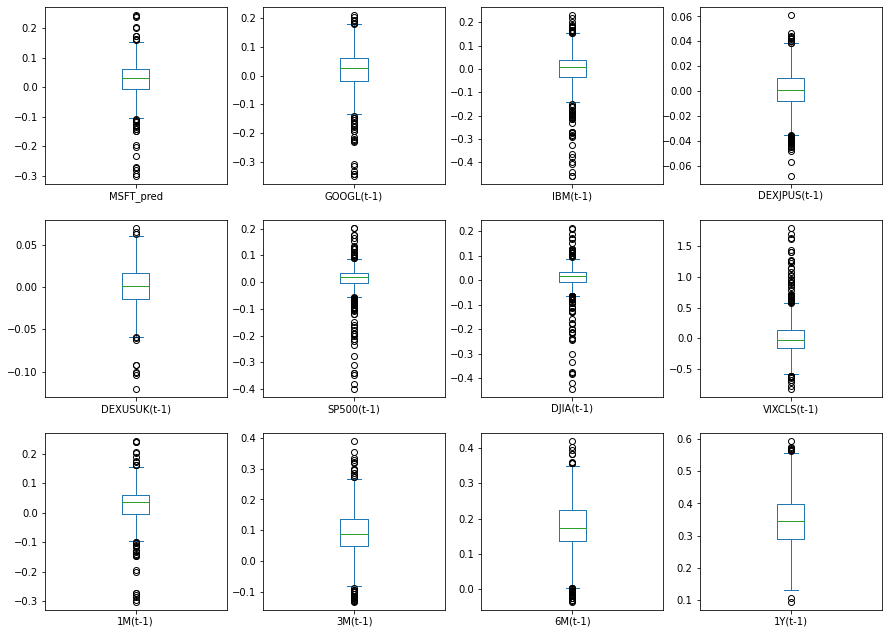

In [31]:
#Box and Whisker Plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,15))
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

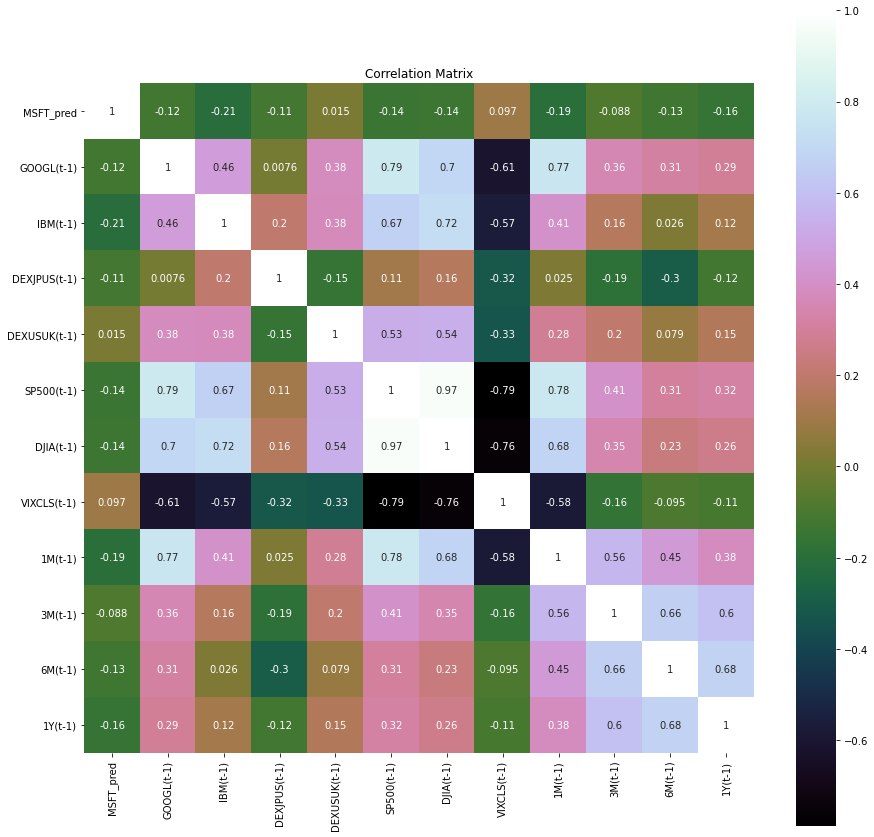

In [20]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

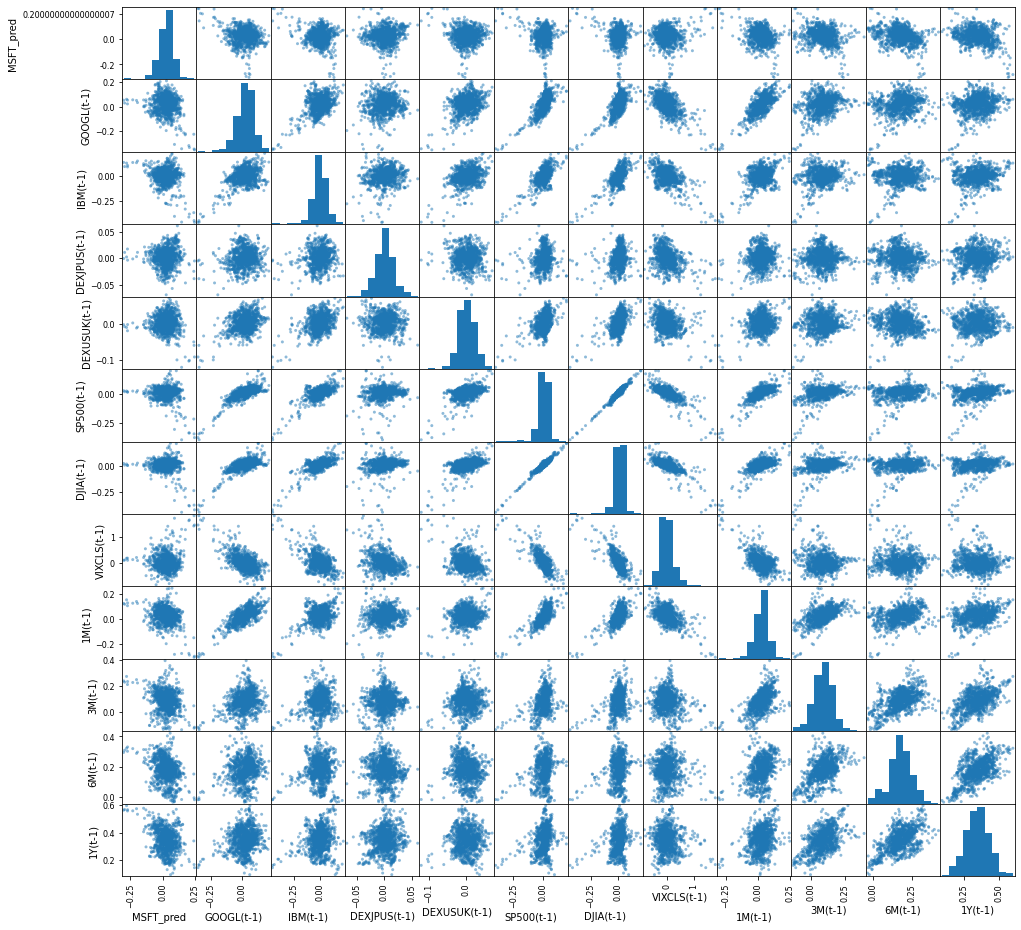

In [33]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(16,16))
plt.show()

<a id='3.3'></a>
## 3.3. Time Series Analysis

Time series broken down into different time series comonent 

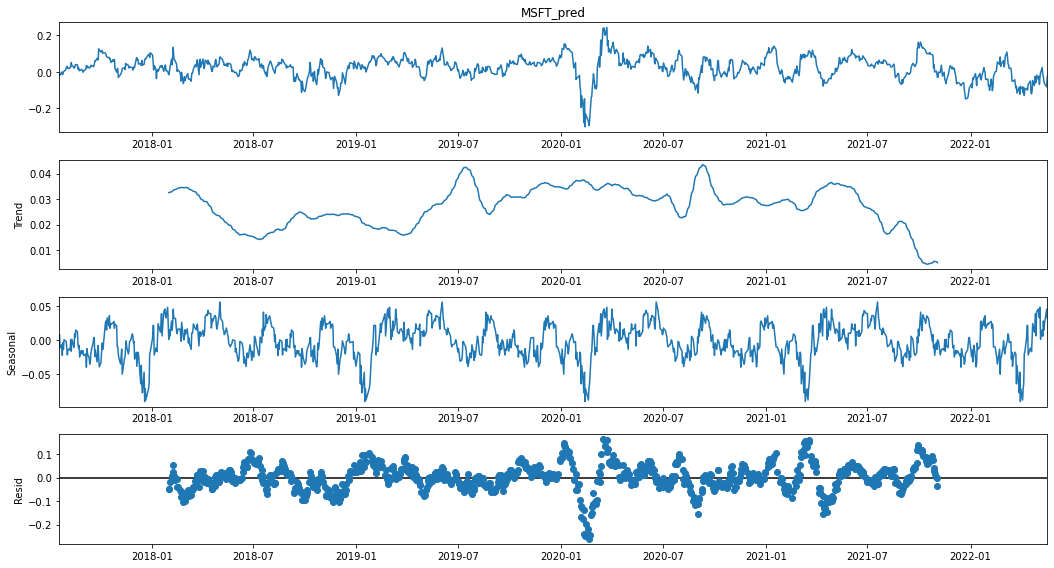

In [21]:
Y= dataset["MSFT_pred"]
res = sm.tsa.seasonal_decompose(Y,freq=252)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

<a id='4'></a>
## 4. Data Preparation

<a id='4.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, probably have to just drop them. 

In [22]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


If there were null values, drop the rows containing the null values.

In [36]:
# Drop the rows containing NA
#dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

#Filling the NAs with the mean of the column.
#dataset['col'] = dataset['col'].fillna(dataset['col'].mean())

<a id='4.3'></a>
## 4.3. Feature Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Dataset.

In [23]:
Y= dataset["MSFT_pred"]
X = dataset.loc[:, dataset.columns != 'MSFT_pred']

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,  f_regression

bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
IBM(t-1),51.162
1M(t-1),44.717
1Y(t-1),28.121
SP500(t-1),24.101
DJIA(t-1),22.187
6M(t-1),18.164
GOOGL(t-1),16.352
DEXJPUS(t-1),14.574
VIXCLS(t-1),10.853


In [25]:
fit.pvalues_

array([5.61435926e-05, 1.51771740e-12, 1.41993065e-04, 6.01794148e-01,
       1.04709930e-06, 2.77827423e-06, 1.01654943e-03, 3.55800884e-11,
       2.88445443e-03, 2.19425760e-05, 1.36796665e-07])

<a id='4.4'></a>
## 4.4. Data Transformation

<a id='4.4.1'></a>
### 4.4.1. Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1.

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
rescaledX.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.677,0.654,0.509,0.750,0.668,0.679,0.297,0.638,0.550,0.629,0.526
1,0.656,0.597,0.494,0.801,0.688,0.688,0.275,0.629,0.572,0.641,0.569
2,0.667,0.597,0.481,0.761,0.689,0.690,0.271,0.663,0.568,0.653,0.484
3,0.652,0.602,0.464,0.761,0.689,0.688,0.272,0.643,0.536,0.634,0.477
4,0.664,0.586,0.465,0.757,0.685,0.684,0.292,0.639,0.504,0.625,0.448


<a id='4.4.2'></a>
### 4.4.2. Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
StandardisedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
StandardisedX.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.196,-0.146,0.134,0.975,-0.108,-0.089,-0.215,0.354,0.495,0.065,-0.055
1,0.039,-0.670,0.017,1.398,0.123,0.022,-0.402,0.276,0.649,0.152,0.212
2,0.120,-0.668,-0.085,1.067,0.131,0.047,-0.440,0.581,0.623,0.239,-0.314
3,0.006,-0.620,-0.221,1.068,0.132,0.031,-0.432,0.400,0.393,0.100,-0.357
4,0.096,-0.771,-0.211,1.036,0.082,-0.025,-0.259,0.360,0.164,0.035,-0.539


<a id='4.4.3'></a>
### 4.4.3. Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

In [28]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
NormalizedX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
NormalizedX.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.073,-0.022,0.012,0.055,0.007,0.005,-0.119,0.116,0.301,0.428,0.830
1,0.041,-0.110,0.006,0.073,0.034,0.018,-0.237,0.094,0.303,0.408,0.810
2,0.058,-0.118,0.002,0.059,0.038,0.023,-0.282,0.146,0.319,0.457,0.753
3,0.039,-0.114,-0.004,0.062,0.040,0.022,-0.289,0.125,0.284,0.444,0.776
4,0.061,-0.156,-0.004,0.065,0.036,0.015,-0.169,0.129,0.255,0.466,0.799


<a id='5'></a>
# 5. Evaluate Algorithms and Models

<a id='5.1'></a>
## 5.1. Train Test Split

In [29]:
# split out validation dataset for the end

test_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
seed = 7
# X_train, X_test, Y_train, Y_vtest = train_test_split(X, Y, test_size=test_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.

train_size = int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

<a id='5.2'></a>
## 5.2. Test Options and Evaluation Metrics


In [30]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
#scoring = 'r2'

<a id='5.3'></a>
## 5.3. Compare Models and Algorithms

<a id='5.3.1'></a>
### 5.3.1. Common Models

In [31]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
models.append(('MLP', MLPRegressor()))

<a id='5.3.2'></a>
### 5.3.2. Ensemble Models

In [32]:
#Ensable Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

<a id='5.3.3'></a>
### 5.3.3. Deep Learning Model-NN Regressor

In [47]:
#Running deep learning models and performing cross validation takes time
#Set the following Flag to 0 if the Deep LEarning Models Flag has to be disabled
EnableDeepLearningRegreesorFlag = 0

def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # create model
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        #The number of hidden layers can be increased
        model.add(Dense(2, activation=activation))
        # Final output layer
        model.add(Dense(1, kernel_initializer='normal'))
        # Compile model
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model   

In [48]:
#Add Deep Learning Regressor
if ( EnableDeepLearningRegreesorFlag == 1):
    models.append(('DNN', KerasRegressor(build_fn=create_model, epochs=100, batch_size=100, verbose=1)))       


<a id='5.3.4'></a>
### 5.3.4 K-folds cross validation

In [40]:
names = []
kfold_results = []
test_results = []
train_results = []

print("Model,\t CrossValMean,\t CrossValSTD,\t train_MSE,\t test_MSE")
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: \t  %f \t  (%f) \t   %f \t   %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

Model,	 CrossValMean,	 CrossValSTD,	 train_MSE,	 test_MSE
LR: 	  0.002771 	  (0.000352) 	   0.002676 	   0.009561
LASSO: 	  0.003418 	  (0.000771) 	   0.003416 	   0.005322
EN: 	  0.003418 	  (0.000771) 	   0.003416 	   0.005322
KNN: 	  0.001440 	  (0.000249) 	   0.000816 	   0.005712
CART: 	  0.002705 	  (0.001146) 	   0.000000 	   0.007424
SVR: 	  0.002467 	  (0.000261) 	   0.002306 	   0.003999
MLP: 	  0.002821 	  (0.000536) 	   0.002715 	   0.005979
ABR: 	  0.002143 	  (0.000316) 	   0.001676 	   0.005614
GBR: 	  0.001559 	  (0.000290) 	   0.000707 	   0.008125
RFR: 	  0.001321 	  (0.000231) 	   0.000185 	   0.006958
ETR: 	  0.001037 	  (0.000222) 	   0.000000 	   0.006234


<a id='5.3.5'></a>
### 5.3.5 Algorithm comparison

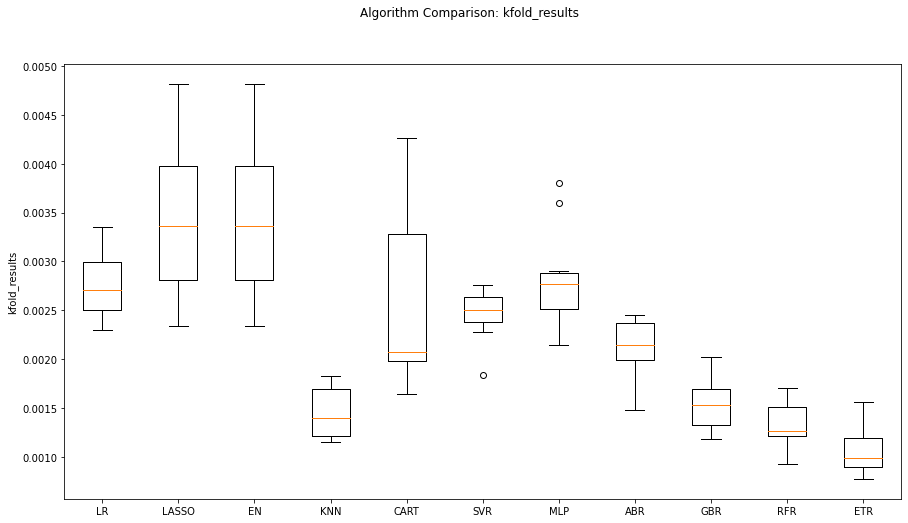

In [34]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison: kfold_results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
plt.ylabel('kfold_results')
fig.set_size_inches(15,8)
plt.show()

# Training and Test error

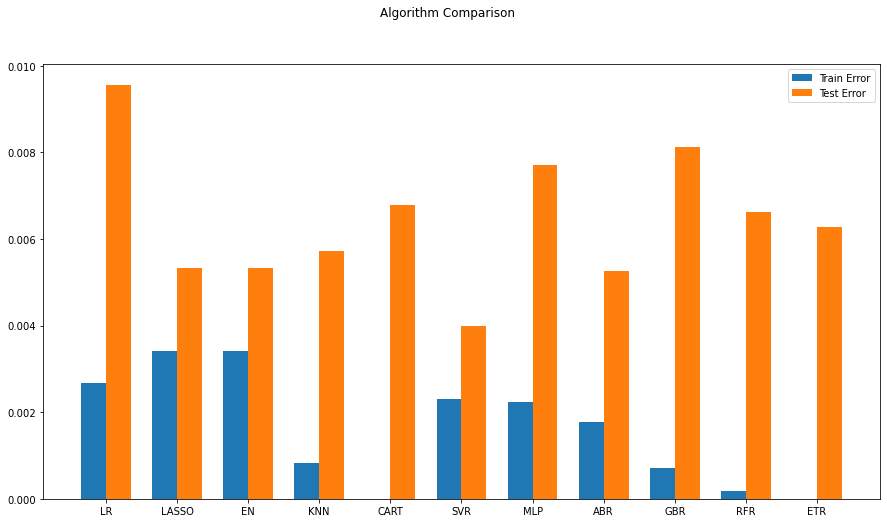

In [35]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

The chart shows MSE. Lower the MSE, better is the model performance.

<a id='5.4'></a>
## 5.4. Time Series based Models- ARIMA and LSTM

<a id='5.4.1'></a>
### 5.4.1 Time Series Model - ARIMA Model

In [36]:
#Preparing data for the ARIMAX Model, seperating endogeneous and exogenous variables
X_train_ARIMA=X_train
X_test_ARIMA=X_test
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [37]:
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])

model_fit = modelARIMA.fit()
#print(model_fit.summary())

error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)

#add 

test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)

names.append("ARIMA")
print('ARIMA test error:\t',error_Test_ARIMA)
print('ARIMA train error:\t',error_Training_ARIMA)

ARIMA test error:	 0.005032748493101292
ARIMA train error:	 0.0006455785552078024


In [54]:
#Add Cross validation if possible
# #model = build_model(_alpha=1.0, _l1_ratio=0.3)
# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)
# scores = cross_val_score(modelARIMA, X_train, Y_train, cv=tscv, scoring=scoring)

<a id='5.4.2'></a>
### 5.4.2 LSTM Model

The data needs to be in 3D format for the LSTM model. So, Performing the data transform. 

In [55]:
X_train_LSTM, X_test_LSTM = np.array(X_train), np.array(X_test)
Y_train_LSTM, Y_test_LSTM = np.array(Y_train), np.array(Y_test)
X_train_LSTM= X_train_LSTM.reshape((X_train_LSTM.shape[0], 1, X_train_LSTM.shape[1]))
X_test_LSTM= X_test_LSTM.reshape((X_test_LSTM.shape[0], 1, X_test_LSTM.shape[1]))
print(X_train_LSTM.shape, Y_train_LSTM.shape, X_test_LSTM.shape, Y_test_LSTM.shape)

(912, 1, 11) (912,) (228, 1, 11) (228,)


In [56]:
# design network
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM,\
                              Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),\
                              epochs=50, batch_size=72, verbose=0, shuffle=False)


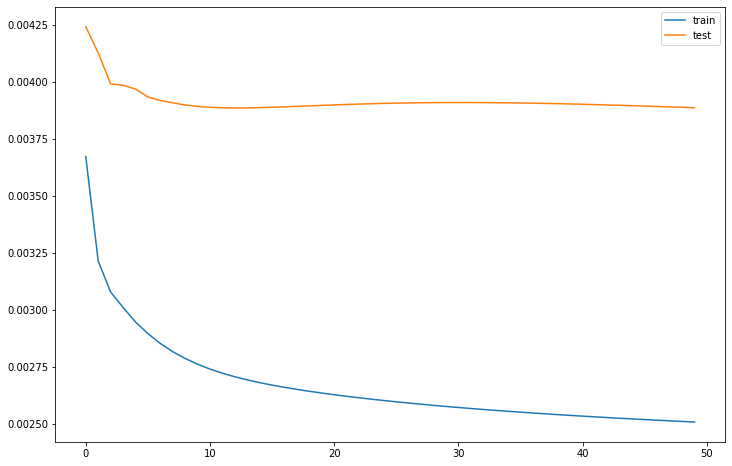

In [57]:
#Visual plot to check if the error is reducing
plt.plot(LSTMModel_fit.history['loss'], label='train')
plt.plot(LSTMModel_fit.history['val_loss'], label='test')
plt.legend()
plt.show()

In [58]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

train_results.append(error_Training_LSTM)
test_results.append(error_Test_LSTM)
names.append("LSTM")

print('For the final model:')
print('MSE:\t ',error_Test_LSTM, '\t RMSE:\t ', np.sqrt(error_Test_LSTM))

For the final model:
MSE:	  0.0038870908951250923 	 RMSE:	  0.062346538758178804


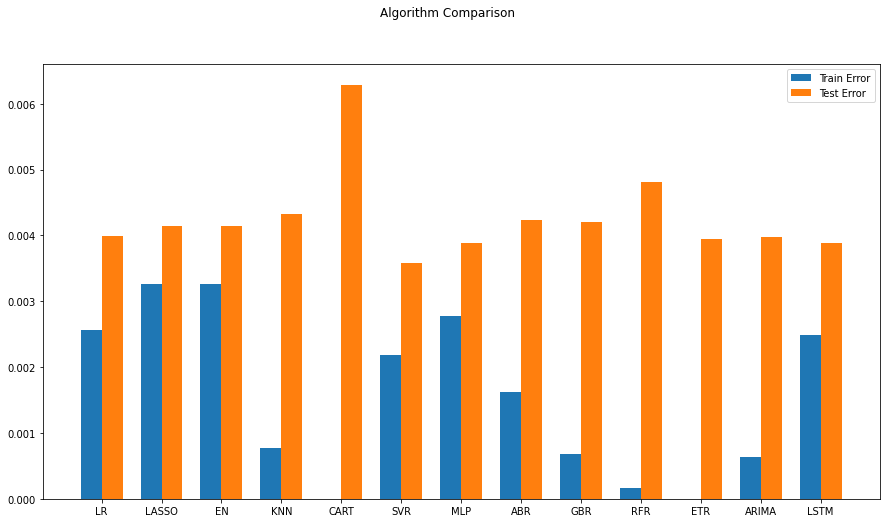

In [59]:
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

Grid Search uses Cross validation which isn't appropriate for the time series models such as LSTM

<a id='6'></a>
# 6. Model Tuning and Grid Search
This section shown the Grid search for all the Machine Learning and time series models mentioned in the book.

<a id='6.1'></a>
### 6.1. Common Regression, Ensemble and DeepNNRegressor Grid Search


In [60]:
# 1. Grid search : LinearRegression
'''
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).
'''
param_grid = {'fit_intercept': [True, False]}
model = LinearRegression()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best score %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best score -0.002658 using {'fit_intercept': True}
-0.002658 (0.000578) with: {'fit_intercept': True}
-0.003144 (0.000697) with: {'fit_intercept': False}


In [61]:
# 2. Grid search : Lasso
'''
alpha : float, optional
    Constant that multiplies the L1 term. Defaults to 1.0.
    ``alpha = 0`` is equivalent to an ordinary least square, solved
    by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.
''' 
param_grid = {'alpha': [0.01, 0.1, 0.3, 0.7, 1, 1.5, 3, 5]}
model = Lasso()
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.003265 using {'alpha': 0.01}
-0.003265 (0.000757) with: {'alpha': 0.01}
-0.003265 (0.000757) with: {'alpha': 0.1}
-0.003265 (0.000757) with: {'alpha': 0.3}
-0.003265 (0.000757) with: {'alpha': 0.7}
-0.003265 (0.000757) with: {'alpha': 1}
-0.003265 (0.000757) with: {'alpha': 1.5}
-0.003265 (0.000757) with: {'alpha': 3}
-0.003265 (0.000757) with: {'alpha': 5}


In [62]:
# 3. Grid Search : ElasticNet
'''
alpha : float, optional
    Constant that multiplies the penalty terms. Defaults to 1.0.
    See the notes for the exact mathematical meaning of this
    parameter.``alpha = 0`` is equivalent to an ordinary least square,
    solved by the :class:`LinearRegression` object. For numerical
    reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
    Given this, you should use the :class:`LinearRegression` object.

l1_ratio : float
    The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For
    ``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` it
    is an L1 penalty.  For ``0 < l1_ratio < 1``, the penalty is a
    combination of L1 and L2.
'''
param_grid = {'alpha': [0.01, 0.1, 0.3, 0.7, 1, 1.5, 3, 5],
              'l1_ratio': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]}
model = ElasticNet()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.002860 using {'alpha': 0.01, 'l1_ratio': 0.01}
-0.002860 (0.000695) with: {'alpha': 0.01, 'l1_ratio': 0.01}
-0.003133 (0.000753) with: {'alpha': 0.01, 'l1_ratio': 0.1}
-0.003265 (0.000757) with: {'alpha': 0.01, 'l1_ratio': 0.3}
-0.003265 (0.000757) with: {'alpha': 0.01, 'l1_ratio': 0.5}
-0.003265 (0.000757) with: {'alpha': 0.01, 'l1_ratio': 0.7}
-0.003265 (0.000757) with: {'alpha': 0.01, 'l1_ratio': 0.9}
-0.003265 (0.000757) with: {'alpha': 0.01, 'l1_ratio': 0.99}
-0.003240 (0.000762) with: {'alpha': 0.1, 'l1_ratio': 0.01}
-0.003265 (0.000757) with: {'alpha': 0.1, 'l1_ratio': 0.1}
-0.003265 (0.000757) with: {'alpha': 0.1, 'l1_ratio': 0.3}
-0.003265 (0.000757) with: {'alpha': 0.1, 'l1_ratio': 0.5}
-0.003265 (0.000757) with: {'alpha': 0.1, 'l1_ratio': 0.7}
-0.003265 (0.000757) with: {'alpha': 0.1, 'l1_ratio': 0.9}
-0.003265 (0.000757) with: {'alpha': 0.1, 'l1_ratio': 0.99}
-0.003265 (0.000757) with: {'alpha': 0.3, 'l1_ratio': 0.01}
-0.003265 (0.000757) with: {'alpha': 0.3, 'l1_r

In [63]:

# 4. Grid search : KNeighborsRegressor 
'''
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for :meth:`kneighbors` queries.
'''
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.001272 using {'n_neighbors': 3}
-0.001457 (0.000265) with: {'n_neighbors': 1}
-0.001272 (0.000284) with: {'n_neighbors': 3}
-0.001323 (0.000381) with: {'n_neighbors': 5}
-0.001354 (0.000374) with: {'n_neighbors': 7}
-0.001427 (0.000377) with: {'n_neighbors': 9}
-0.001507 (0.000327) with: {'n_neighbors': 11}
-0.001573 (0.000297) with: {'n_neighbors': 13}
-0.001637 (0.000293) with: {'n_neighbors': 15}
-0.001717 (0.000313) with: {'n_neighbors': 17}
-0.001804 (0.000338) with: {'n_neighbors': 19}
-0.001878 (0.000345) with: {'n_neighbors': 21}


In [64]:
# 5. Grid search : DecisionTreeRegressor 
'''
min_samples_split : int, float, optional (default=2)
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a percentage and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.
'''
param_grid={'min_samples_split': [2,3,4,5,6,7,8,9,10]}
model = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.002133 using {'min_samples_split': 9}
-0.002373 (0.000454) with: {'min_samples_split': 2}
-0.002307 (0.000617) with: {'min_samples_split': 3}
-0.002266 (0.000370) with: {'min_samples_split': 4}
-0.002301 (0.000468) with: {'min_samples_split': 5}
-0.002226 (0.000442) with: {'min_samples_split': 6}
-0.002213 (0.000320) with: {'min_samples_split': 7}
-0.002243 (0.000328) with: {'min_samples_split': 8}
-0.002133 (0.000323) with: {'min_samples_split': 9}
-0.002211 (0.000311) with: {'min_samples_split': 10}


In [65]:
# 6. Grid search : SVR 
'''
C : float, optional (default=1.0)
    Penalty parameter C of the error term.

epsilon : float, optional (default=0.1)
     Epsilon in the epsilon-SVR model. It specifies the epsilon-tube
     within which no penalty is associated in the training loss function
     with points predicted within a distance epsilon from the actual
     value.
gamma : float, optional (default='auto')
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
    If gamma is 'auto' then 1/n_features will be used instead.
'''
param_grid={'C': [0.01, 0.03,0.1,0.3,1,3,10,30,100],
            'gamma': [0.001, 0.01, 0.1, 1]},
            #'epslion': [0.01, 0.1, 1]}
model = SVR()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.002374 using {'C': 3, 'gamma': 1}
-0.003290 (0.000767) with: {'C': 0.01, 'gamma': 0.001}
-0.003276 (0.000768) with: {'C': 0.01, 'gamma': 0.01}
-0.003192 (0.000768) with: {'C': 0.01, 'gamma': 0.1}
-0.002937 (0.000706) with: {'C': 0.01, 'gamma': 1}
-0.003288 (0.000768) with: {'C': 0.03, 'gamma': 0.001}
-0.003249 (0.000772) with: {'C': 0.03, 'gamma': 0.01}
-0.003094 (0.000776) with: {'C': 0.03, 'gamma': 0.1}
-0.002780 (0.000658) with: {'C': 0.03, 'gamma': 1}
-0.003276 (0.000768) with: {'C': 0.1, 'gamma': 0.001}
-0.003204 (0.000774) with: {'C': 0.1, 'gamma': 0.01}
-0.002891 (0.000727) with: {'C': 0.1, 'gamma': 0.1}
-0.002654 (0.000615) with: {'C': 0.1, 'gamma': 1}
-0.003249 (0.000772) with: {'C': 0.3, 'gamma': 0.001}
-0.003136 (0.000791) with: {'C': 0.3, 'gamma': 0.01}
-0.002781 (0.000694) with: {'C': 0.3, 'gamma': 0.1}
-0.002593 (0.000590) with: {'C': 0.3, 'gamma': 1}
-0.003205 (0.000776) with: {'C': 1, 'gamma': 0.001}
-0.002948 (0.000753) with: {'C': 1, 'gamma': 0.01}
-0.002737 

In [66]:
# 7. Grid search : MLPRegressor 
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.
'''
param_grid={'hidden_layer_sizes': [(20,), (50,), (20,20), (20, 30, 20)]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.002979 using {'hidden_layer_sizes': (20, 30, 20)}
-0.004274 (0.001563) with: {'hidden_layer_sizes': (20,)}
-0.003330 (0.001037) with: {'hidden_layer_sizes': (50,)}
-0.003561 (0.001818) with: {'hidden_layer_sizes': (20, 20)}
-0.002979 (0.000744) with: {'hidden_layer_sizes': (20, 30, 20)}


In [67]:
# 8. Grid search : RandomForestRegressor 
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
'''
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001167 using {'n_estimators': 400}
-0.001201 (0.000226) with: {'n_estimators': 50}
-0.001199 (0.000227) with: {'n_estimators': 100}
-0.001170 (0.000224) with: {'n_estimators': 150}
-0.001183 (0.000247) with: {'n_estimators': 200}
-0.001175 (0.000247) with: {'n_estimators': 250}
-0.001170 (0.000236) with: {'n_estimators': 300}
-0.001184 (0.000254) with: {'n_estimators': 350}
-0.001167 (0.000234) with: {'n_estimators': 400}


In [68]:

# 9. Grid search : GradientBoostingRegressor 
'''
n_estimators:

    The number of boosting stages to perform. Gradient boosting
    is fairly robust to over-fitting so a large number usually
    results in better performance.
''' 
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001397 using {'n_estimators': 400}
-0.001643 (0.000370) with: {'n_estimators': 50}
-0.001487 (0.000343) with: {'n_estimators': 100}
-0.001437 (0.000313) with: {'n_estimators': 150}
-0.001413 (0.000301) with: {'n_estimators': 200}
-0.001403 (0.000303) with: {'n_estimators': 250}
-0.001398 (0.000298) with: {'n_estimators': 300}
-0.001398 (0.000299) with: {'n_estimators': 350}
-0.001397 (0.000298) with: {'n_estimators': 400}


In [69]:
# 10. Grid search : ExtraTreesRegressor 
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
''' 
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000966 using {'n_estimators': 150}
-0.000999 (0.000231) with: {'n_estimators': 50}
-0.000979 (0.000229) with: {'n_estimators': 100}
-0.000966 (0.000228) with: {'n_estimators': 150}
-0.000967 (0.000223) with: {'n_estimators': 200}
-0.000968 (0.000229) with: {'n_estimators': 250}
-0.000968 (0.000226) with: {'n_estimators': 300}
-0.000967 (0.000224) with: {'n_estimators': 350}
-0.000966 (0.000223) with: {'n_estimators': 400}


In [70]:
# 11. Grid search : AdaBoostRegre
'''
n_estimators : integer, optional (default=50)
    The maximum number of estimators at which boosting is terminated.
    In case of perfect fit, the learning procedure is stopped early.

learning_rate : float, optional (default=1.)
    Learning rate shrinks the contribution of each regressor by
    ``learning_rate``. There is a trade-off between ``learning_rate`` and
    ``n_estimators``.
''' 
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400],
             'learning_rate': [1, 2, 3]}
model = AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001899 using {'learning_rate': 3, 'n_estimators': 400}
-0.001999 (0.000403) with: {'learning_rate': 1, 'n_estimators': 50}
-0.001987 (0.000385) with: {'learning_rate': 1, 'n_estimators': 100}
-0.001972 (0.000382) with: {'learning_rate': 1, 'n_estimators': 150}
-0.001973 (0.000392) with: {'learning_rate': 1, 'n_estimators': 200}
-0.001977 (0.000389) with: {'learning_rate': 1, 'n_estimators': 250}
-0.001973 (0.000393) with: {'learning_rate': 1, 'n_estimators': 300}
-0.001970 (0.000394) with: {'learning_rate': 1, 'n_estimators': 350}
-0.001967 (0.000394) with: {'learning_rate': 1, 'n_estimators': 400}
-0.001920 (0.000356) with: {'learning_rate': 2, 'n_estimators': 50}
-0.001906 (0.000361) with: {'learning_rate': 2, 'n_estimators': 100}
-0.001920 (0.000362) with: {'learning_rate': 2, 'n_estimators': 150}
-0.001906 (0.000376) with: {'learning_rate': 2, 'n_estimators': 200}
-0.001921 (0.000376) with: {'learning_rate': 2, 'n_estimators': 250}
-0.001933 (0.000371) with: {'learning_rat

In [71]:
# 12. Grid search : KerasNNRegressor 
'''
nn_shape : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.
''' 
#Add Deep Learning Regressor
if ( EnableDeepLearningRegreesorFlag == 1):
    param_grid={'nn_shape': [(20,), (50,), (20,20), (20, 30, 20)]}
    model = KerasNNRegressor()
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid_result = grid.fit(X_train, Y_train)
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))


<a id='6.2'></a>
### 6.2. Grid Search- Time Series Models

In [72]:
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()   
    #error on the test set
#     tr_len = len(X_train_ARIMA)
#     to_len = len(X_train_ARIMA) + len(X_test_ARIMA)
#     predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
#     error = mean_squared_error(predicted, Y_test)
    # error on the training set 
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)    

ARIMA(0, 0, 0) MSE=0.0025707
ARIMA(0, 0, 1) MSE=0.0014074
ARIMA(1, 0, 0) MSE=0.0006349
ARIMA(1, 0, 1) MSE=0.0006214
ARIMA(2, 0, 0) MSE=0.0006191
ARIMA(2, 0, 1) MSE=0.0006191
Best ARIMA(2, 0, 1) MSE=0.0006191


In [73]:
#Grid Search for LSTM Model

# evaluate an LSTM model for a given order (p,d,q)
def evaluate_LSTM_model(neurons=12, learn_rate = 0.01, momentum=0):
    #predicted = list()     
    LSTMModel = create_LSTMmodel(neurons, learn_rate, momentum)
    LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM,epochs=50, batch_size=72, verbose=0, shuffle=False)
    predicted = LSTMModel.predict(X_test_LSTM)
    error = mean_squared_error(predicted, Y_test)
    return error

# evaluate combinations of different variables of LSTM Model
def evaluate_combinations_LSTM(neurons, learn_rate, momentum): 
    best_score, best_cfg = float("inf"), None
    for n in neurons:
        for l in learn_rate:
            for m in momentum:
                combination = (n,l,m)                
                try:
                    mse = evaluate_LSTM_model(n,l,m)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, combination
                    print('LSTM%s MSE=%.7f' % (combination,mse))
                except:
                    continue
    print('Best LSTM%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
neurons = [1, 5]
learn_rate = [0.001, 0.3]
momentum = [0.0, 0.9]
#Other Parameters can be modified as well
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
warnings.filterwarnings("ignore")
evaluate_combinations_LSTM(neurons,learn_rate,momentum)    

LSTM(1, 0.001, 0.0) MSE=0.0039501
LSTM(1, 0.001, 0.9) MSE=0.0038822
LSTM(1, 0.3, 0.0) MSE=0.0038656
LSTM(1, 0.3, 0.9) MSE=0.0039138
LSTM(5, 0.001, 0.0) MSE=0.0039345
LSTM(5, 0.001, 0.9) MSE=0.0038982
LSTM(5, 0.3, 0.0) MSE=0.0038981
LSTM(5, 0.3, 0.9) MSE=0.0038862
Best LSTM(1, 0.3, 0.0) MSE=0.0038656


<a id='7'></a>
# 7. Finalize the Model

Let us select one of the model to finalize the data. Looking at the results for the Random Forest Model. Looking at the results for the RandomForestRegressor model

<a id='7.1'></a>
## 7.1. Results on the Test Dataset

In [74]:
# prepare model
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(n_estimators=250) # rbf is default kernel
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=250)

In [75]:
# estimate accuracy on validation set
# transform the validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(X_test)
print(mean_squared_error(Y_test, predictions))
print(r2_score(Y_test, predictions))

0.004683699235224608
-0.15427540886949243


In [76]:
predictions

array([ 0.09070442, -0.00445794,  0.04209182,  0.017162  , -0.12320171,
        0.03699773,  0.01182431, -0.01919951,  0.00615612, -0.19466364,
       -0.21982509,  0.01340359,  0.00419859,  0.04155124,  0.05616385,
        0.03995804,  0.05191514,  0.07666795,  0.04974729,  0.06615994,
        0.02021898,  0.03193494,  0.01824152,  0.04514337,  0.07211182,
        0.03304506,  0.03333553,  0.04099623,  0.02924402,  0.01769848,
        0.04220692,  0.0371817 ,  0.01878991,  0.01892726,  0.01904512,
        0.01929585,  0.02540531,  0.02295715,  0.01755856,  0.01996295,
        0.02832698,  0.02337636,  0.03126987,  0.02209011, -0.01414816,
        0.00670085,  0.01895931,  0.01265659,  0.00646143,  0.02629697,
        0.04250899,  0.03593121,  0.04019683,  0.04118378,  0.03907806,
        0.04328047,  0.03748675,  0.03866085,  0.03482986,  0.03665945,
        0.0263579 ,  0.04550517,  0.0414599 ,  0.01755354,  0.03057431,
        0.01633062,  0.01254639,  0.02940164,  0.03129982,  0.00

<a id='7.2'></a>
## 7.2. Variable Intuition/Feature Importance
Let us look into the Feature Importance of the Random Forest model

[0.07936311 0.05141904 0.06362116 0.05727698 0.0669136  0.09423419
 0.04405265 0.04132708 0.0494736  0.1192917  0.33302689]


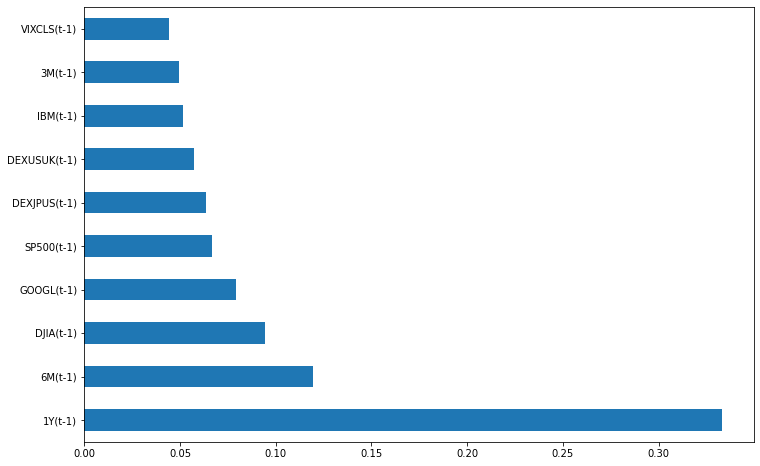

In [77]:
import pandas as pd
import numpy as np
model = RandomForestRegressor()
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based regressors
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<a id='7.3'></a>
## 7.3. Save Model for Later Use

In [78]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

In [79]:
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation) #in case the data is scaled.
#predictions = model.predict(rescaledValidationX)
predictions = model.predict(X_test)
result = mean_squared_error(Y_test, predictions)
print(result)

0.004870104715679929
